In [1]:
#Import dependancies
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
from scipy.stats import linregress


In [2]:
#Covid data reading and column checking 
Covid_records = "Resources/IL_covid_data.csv"
Covid_recordsDF = pd.read_csv(Covid_records, encoding="utf-8")
Covid_recordsDF.columns

Index(['Date', 'Cases - Total', 'Deaths - Total', 'Hospitalizations - Total',
       'Cases - Age 0-17', 'Cases - Age 18-29', 'Cases - Age 30-39',
       'Cases - Age 40-49', 'Cases - Age 50-59', 'Cases - Age 60-69',
       'Cases - Age 70-79', 'Cases -  Age 80+', 'Cases - Age Unknown',
       'Cases - Female', 'Cases - Male', 'Cases - Unknown Gender',
       'Cases - Latinx', 'Cases - Asian Non-Latinx',
       'Cases - Black Non-Latinx', 'Cases - White Non-Latinx',
       'Cases - Other Race Non-Latinx', 'Cases - Unknown Race/Ethnicity',
       'Deaths - Age 0-17', 'Deaths - Age 18-29', 'Deaths - Age 30-39',
       'Deaths - Age 40-49', 'Deaths - Age 50-59', 'Deaths - Age 60-69',
       'Deaths - Age 70-79', 'Deaths - Age 80+', 'Deaths - Age Unknown',
       'Deaths - Female', 'Deaths - Male', 'Deaths - Unknown Gender',
       'Deaths - Latinx', 'Deaths - Asian Non-Latinx',
       'Deaths - Black Non-Latinx', 'Deaths - White Non-Latinx',
       'Deaths - Other Race Non-Latinx', 'Death

In [3]:
Covid_recordsDF.dtypes

Date                                          object
Cases - Total                                 object
Deaths - Total                                 int64
Hospitalizations - Total                      object
Cases - Age 0-17                               int64
Cases - Age 18-29                              int64
Cases - Age 30-39                              int64
Cases - Age 40-49                              int64
Cases - Age 50-59                              int64
Cases - Age 60-69                              int64
Cases - Age 70-79                              int64
Cases -  Age 80+                               int64
Cases - Age Unknown                            int64
Cases - Female                                object
Cases - Male                                  object
Cases - Unknown Gender                         int64
Cases - Latinx                                object
Cases - Asian Non-Latinx                       int64
Cases - Black Non-Latinx                      

In [4]:
# Filtered DF from specific columns
Covid_cols = ["Date", "Cases - Total"]
Covid_transformed= Covid_recordsDF[Covid_cols].copy()

#clean
Covid_transformed.drop_duplicates("Date", inplace=True)
Covid_transformed.dropna()
Covid_transformed.head()

,Date,Cases - Total
0,3/1/2020,0
1,3/2/2020,0
2,3/3/2020,0
3,3/4/2020,0
4,3/5/2020,1


In [5]:
#Datetime for Covid
Covid_transformed['Date'] = pd.to_datetime(Covid_transformed['Date'], format="%m/%d/%Y")
Covid_transformed.dtypes

Date             datetime64[ns]
Cases - Total            object
dtype: object

In [6]:
#Crime data reading and column checking 
Crime_datadf = "Resources/Chi_crime_data.csv"
Crime_datadf = pd.read_csv(Crime_datadf, encoding="utf-8")
Crime_datadf.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [7]:
Crime_datadf.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,02/25/2020 10:20:00 AM,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,02/25/2020 05:30:00 AM,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,02/25/2020 01:04:00 PM,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,02/25/2020 06:05:00 PM,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,02/25/2020 01:42:00 PM,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"


In [8]:
#fixing dates and merging DFs
Crime_datadf['DATE  OF OCCURRENCE'] = pd.to_datetime(Crime_datadf['DATE  OF OCCURRENCE'], format="%m/%d/%Y %I:%M:%S %p")
Crime_datadf.dtypes

CASE#                             object
DATE  OF OCCURRENCE       datetime64[ns]
BLOCK                             object
 IUCR                             object
 PRIMARY DESCRIPTION              object
 SECONDARY DESCRIPTION            object
 LOCATION DESCRIPTION             object
ARREST                            object
DOMESTIC                          object
BEAT                               int64
WARD                             float64
FBI CD                            object
X COORDINATE                     float64
Y COORDINATE                     float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
dtype: object

In [9]:
Crime_datadf['DATE  OF OCCURRENCE'] = Crime_datadf['DATE  OF OCCURRENCE'].apply(lambda x: x.replace(hour=0, minute=0, second=0))

In [10]:
Crime_datadf.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [11]:
Crime_datadf.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,2020-02-25,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,2020-02-25,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,2020-02-25,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,2020-02-25,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,2020-02-25,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"


In [21]:
#Clean that Data 
Crime_cols = ["CASE#", " IUCR", "DATE  OF OCCURRENCE", " PRIMARY DESCRIPTION", " SECONDARY DESCRIPTION", " LOCATION DESCRIPTION", "ARREST", "DOMESTIC"]
Crime_transformed = Crime_datadf[Crime_cols].copy()

Crime_transformed.drop_duplicates("CASE#", inplace=True)
Crime_transformed.dropna()
Crime_transformed.rename(columns={"DATE  OF OCCURRENCE": "Date"}, inplace=True)
Crime_transformed.head()

,CASE#,IUCR,Date,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC
0,JD164115,0460,2020-02-25,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N
1,JD163938,0820,2020-02-25,THEFT,$500 AND UNDER,STREET,N,N
2,JC164345,1330,2020-02-25,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N
3,JD164701,0486,2020-02-25,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y
4,JD164416,2027,2020-02-25,NARCOTICS,POSS: CRACK,STREET,Y,N


In [22]:
#Merge to a single df
combined_data_df = pd.merge(Covid_transformed, Crime_transformed, on = "Date")

In [23]:
Covid_recordsDF

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
0,3/1/2020,0,0,2,0,0,0,0,0,0,...,0.0,1,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,3/2/2020,0,0,1,0,0,0,0,0,0,...,0.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3/3/2020,0,0,3,0,0,0,0,0,0,...,0.0,1,2,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,3/4/2020,0,0,3,0,0,0,0,0,0,...,0.0,1,2,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,3/5/2020,1,0,5,0,0,0,0,1,0,...,0.0,2,3,0.0,0.0,0.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1/23/2021,535,3,NaN,65,110,122,77,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,1/24/2021,276,4,NaN,30,59,60,36,35,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,1/25/2021,537,6,NaN,55,128,103,81,72,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,1/26/2021,140,1,NaN,14,22,32,25,24,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Crime_datadf

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,2020-02-25,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,2020-02-25,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,2020-02-25,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,2020-02-25,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,2020-02-25,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205918,JD430516,2020-10-25,029XX N MELVINA AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,N,N,2511,30.0,11,1134560.0,1918918.0,41.933710,-87.780916,"(41.933709921, -87.780916246)"
205919,JD430452,2020-11-07,011XX S MICHIGAN AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL / MOTEL,N,N,123,4.0,02,1177417.0,1895669.0,41.869048,-87.624126,"(41.869047845, -87.624125523)"
205920,JD434095,2020-11-17,047XX N KEDZIE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,1713,33.0,08A,1154189.0,1931371.0,41.967512,-87.708446,"(41.967512085, -87.708446268)"
205921,JD453566,2020-12-08,037XX N RECREATION DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,PARK PROPERTY,N,Y,1925,46.0,08B,1171826.0,1925510.0,41.951058,-87.643771,"(41.951058037, -87.643770543)"


In [25]:
combined_data_df

,Date,Cases - Total,CASE#,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC
0,2020-03-01,0,JD170468,0110,HOMICIDE,FIRST DEGREE MURDER,VESTIBULE,Y,N
1,2020-03-01,0,JD368864,0890,THEFT,FROM BUILDING,OTHER (SPECIFY),N,N
2,2020-03-01,0,JD170475,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,Y,Y
3,2020-03-01,0,JD191229,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,N,N
4,2020-03-01,0,JD170171,2027,NARCOTICS,POSSESS - CRACK,APARTMENT,Y,N
...,...,...,...,...,...,...,...,...,...
181402,2021-01-20,735,JE118499,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,N,N
181403,2021-01-20,735,JE120790,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,N,N
181404,2021-01-20,735,JE118095,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,Y,Y
181405,2021-01-20,735,JE118279,0460,BATTERY,SIMPLE,APARTMENT,N,Y


Text(0, 0.5, '# of Cases')

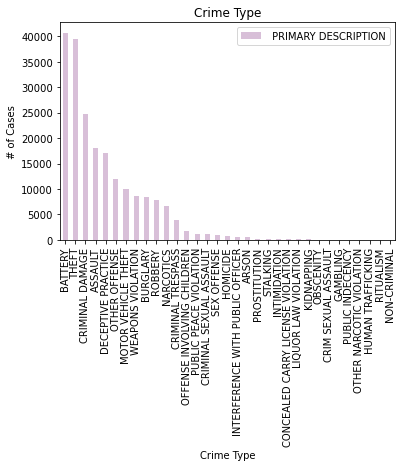

In [30]:
#First Quesyion Bar plot
crime_type_df = pd.DataFrame(Crime_transformed[" PRIMARY DESCRIPTION"].value_counts())
first_question_plot = crime_type_df.plot(kind="bar", title=("Crime Type"), color='thistle')
first_question_plot.set_xlabel('Crime Type')
first_question_plot.set_ylabel('# of Cases')